### HR - Attrition Analytics -  Exploratory Analysis & Predictive Modeling
> Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire <br>
> and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources.  <br>
> So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition  <br>
> risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the  <br>
> impact to the orgranization.

### DATA ATRRIBUTES

satisfaction_level: Employee satisfaction level <br>
last_evaluation: Last evaluation  <br>
number_project: Number of projects  <br>
average_montly_hours: Average monthly hours <br>
time_spend_company: Time spent at the company <br>
Work_accident: Whether they have had a work accident <br>
promotion_last_5years: Whether they have had a promotion in the last 5 years <br>
department: Department <br>
salary: Salary <br>
left: Whether the employee has left <br>

In [145]:
import pandas as pd
import numpy as np

In [146]:
# Load the data
hr_df = pd.read_csv( 'HR_comma_sep.csv' )

In [147]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [148]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [149]:
#missings
hr_df.isnull().any().sum()

0

In [150]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


The summary statistics for Work_accident, left and promotion_last_5years does not make sense, as they are categorical variables

### PREDICTIVE MODEL: Build a model to predict if an employee will leave the company

In [7]:
# Encoding Categorical Features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company']

categorical_features = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [151]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [152]:
for c_feature in categorical_features:
    hr_df = create_dummies( hr_df, c_feature )

In [153]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [154]:
#Splitting the data

feature_columns = hr_df.columns.difference( ['left'] )
#feature_columns1 = feature_columns

In [155]:
feature_columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [156]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( hr_df[feature_columns],
                                                  hr_df['left'],
                                                  test_size = 0.3,
                                                  random_state = 42 )

In [157]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
logreg.predict(train_X)   #by default, it use cut-off as 0.5

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [16]:
logreg.predict_proba(train_X)

array([[0.35269749, 0.64730251],
       [0.97423454, 0.02576546],
       [0.46976005, 0.53023995],
       ...,
       [0.8957553 , 0.1042447 ],
       [0.74857504, 0.25142496],
       [0.83504887, 0.16495113]])

In [17]:
logreg.coef_

array([[-1.47274238,  0.00478214, -0.62127086,  0.15453024,  0.37327747,
        -0.33877871,  0.18732696,  0.04770811,  0.10244374,  0.11438416,
         0.20996173,  0.55294784, -0.29274896, -1.16425845,  1.8420985 ,
         1.32324268, -4.10265569,  0.2641769 ]])

In [18]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('Work_accident_1', -1.4727423792261067),
 ('average_montly_hours', 0.0047821412902348545),
 ('department_RandD', -0.6212708573507439),
 ('department_accounting', 0.15453023713037387),
 ('department_hr', 0.37327746853406807),
 ('department_management', -0.33877871278144567),
 ('department_marketing', 0.18732696394991571),
 ('department_product_mng', 0.04770811016428727),
 ('department_sales', 0.10244373608387923),
 ('department_support', 0.11438415735899739),
 ('department_technical', 0.2099617258151288),
 ('last_evaluation', 0.5529478377270269),
 ('number_project', -0.29274895679622603),
 ('promotion_last_5years_1', -1.1642584497877033),
 ('salary_low', 1.8420985039890563),
 ('salary_medium', 1.323242683376327),
 ('satisfaction_level', -4.102655685499827),
 ('time_spend_company', 0.2641769013840961)]

In [19]:
logreg.intercept_

array([-1.53981443])

In [159]:
#Predicting the test cases
hr_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [160]:

hr_test_pred = hr_test_pred.reset_index()

In [161]:
#Comparing the predictions with actual test data
hr_test_pred.sample( n = 10 )

,index,actual,predicted
882,8063,0,0
1868,2177,0,1
559,2201,0,1
384,1475,1,0
3544,6372,0,0
2122,10594,0,0
3284,5936,0,0
1847,3852,0,0
1023,1580,1,0
3834,9015,0,0


In [162]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                            hr_test_pred.predicted, [1,0] )
cm

array([[ 351,  721],
       [ 255, 3173]], dtype=int64)

In [163]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5, 15.0, 'Predicted label')

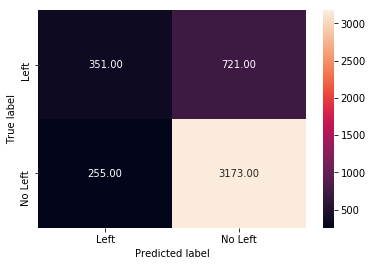

In [164]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [165]:
score = metrics.accuracy_score( hr_test_pred.actual, hr_test_pred.predicted )
round( float(score), 2 )

0.78

Overall test accuracy is 78%. But it is not a good measure. The result is very high as there are lots of cases which are no left and the model has predicted most of them as no left. <br>
The objective of the model is to indentify the people who will leave, so that the company can intervene and act.<br>
This might be the case as the default model assumes people with more than 0.5 probability will not leave the company

In [166]:
# Predit Probability
print(test_X[:1])
print(logreg.predict_proba( test_X[:1] ))

      Work_accident_1  average_montly_hours  department_RandD  \
6723                1                   226                 0   

      department_accounting  department_hr  department_management  \
6723                      0              0                      0   

      department_marketing  department_product_mng  department_sales  \
6723                     1                       0                 0   

      department_support  department_technical  last_evaluation  \
6723                   0                     0             0.96   

      number_project  promotion_last_5years_1  salary_low  salary_medium  \
6723               5                        0           0              1   

      satisfaction_level  time_spend_company  
6723                0.65                   2  
[[0.97047392 0.02952608]]


The model is predicting the probability of him leaving the company is only 0.027, which is very low.

In [168]:
#How good the model is?
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.970474,0.029526
1,0.918471,0.081529
2,0.770428,0.229572
3,0.518490,0.481510
4,0.975083,0.024917


In [169]:
hr_test_pred = pd.concat( [hr_test_pred, predict_proba_df], axis = 1 )

In [170]:
hr_test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [172]:
hr_test_pred.head()

,index,actual,predicted,Left_0,Left_1
0,6723,0,0,0.970474,0.029526
1,6473,0,0,0.918471,0.081529
2,4679,0,0,0.770428,0.229572
3,862,1,0,0.518490,0.481510
4,7286,0,0,0.975083,0.024917


In [173]:
auc_score = metrics.roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1  )
round( float( auc_score ), 2 )

0.82

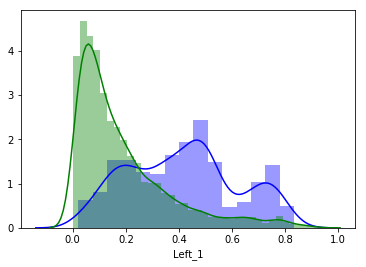

In [174]:
sn.distplot( hr_test_pred[hr_test_pred.actual == 1]["Left_1"], color = 'b' )
sn.distplot( hr_test_pred[hr_test_pred.actual == 0]["Left_1"], color = 'g' )

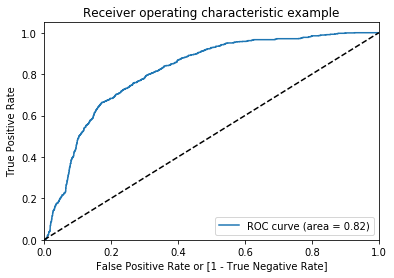

In [175]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( hr_test_pred.actual,
                                     hr_test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [176]:
print(thresholds[0:10])
print(fpr[0:10])
print(tpr[0:10])

[1.91819504 0.91819504 0.90340086 0.88441893 0.88264704 0.8795655
 0.86934365 0.86900773 0.86844037 0.86430086]
[0.         0.00058343 0.00087515 0.00116686 0.00145858 0.00175029
 0.00204201 0.00233372 0.00262544 0.00291715]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [177]:
cutoff_prob = thresholds[(np.abs(tpr - 0.7)).argmin()]

In [178]:
round( float( cutoff_prob ), 2 )

0.29

In [179]:
#Predicting with new cut-off probability
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map( lambda x: 1 if x >= 0.29 else 0 )

In [180]:
hr_test_pred[0:10]

,index,actual,predicted,Left_0,Left_1,new_labels
0,6723,0,0,0.970474,0.029526,0
1,6473,0,0,0.918471,0.081529,0
2,4679,0,0,0.770428,0.229572,0
3,862,1,0,0.518490,0.481510,1
4,7286,0,0,0.975083,0.024917,0
5,8127,0,0,0.725038,0.274962,0
6,3017,0,0,0.985036,0.014964,0
7,3087,0,1,0.131560,0.868440,1
8,6425,0,0,0.766019,0.233981,0
9,2250,0,1,0.401986,0.598014,1


Text(0.5, 15.0, 'Predicted label')

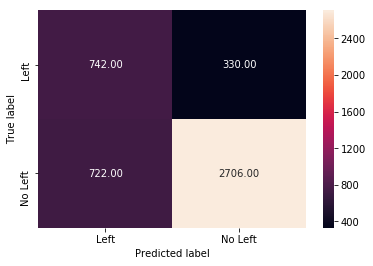

In [181]:

cm = metrics.confusion_matrix( hr_test_pred.actual,
                          hr_test_pred.new_labels, [1,0] )
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Building Decision Tree Model

In [40]:
import sklearn.tree as dt

In [41]:
dir(dt)

['DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_criterion',
 '_splitter',
 '_tree',
 '_utils',
 'export',
 'export_graphviz',
 'tree']

In [42]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

In [182]:
DecisionTreeClassifier?

In [183]:
clf_tree = DecisionTreeClassifier( max_depth = 4 )
clf_tree=clf_tree.fit( train_X, train_y )

In [184]:
clf_tree.predict_proba(train_X)

array([[0.        , 1.        ],
       [0.98673783, 0.01326217],
       [0.02836231, 0.97163769],
       ...,
       [0.98673783, 0.01326217],
       [0.13409415, 0.86590585],
       [0.98673783, 0.01326217]])

In [185]:
pd.DataFrame(clf_tree.predict_proba(train_X)).head()

,0,1
0,0.000000,1.000000
1,0.986738,0.013262
2,0.028362,0.971638
3,0.986738,0.013262
4,0.134094,0.865906


In [186]:
pd.DataFrame(clf_tree.predict_proba(train_X))[1]

0        1.000000
1        0.013262
2        0.971638
3        0.013262
4        0.865906
5        1.000000
6        0.013262
7        0.971638
8        0.971638
9        0.013262
10       0.013262
11       0.067044
12       0.971638
13       0.013262
14       1.000000
15       0.067044
16       0.013262
17       0.013262
18       0.013262
19       0.039474
20       0.013262
21       0.021505
22       0.014894
23       0.013262
24       0.013262
25       0.013262
26       0.013262
27       0.014894
28       0.013262
29       1.000000
           ...   
10469    0.013262
10470    0.013262
10471    0.971638
10472    0.013262
10473    0.013262
10474    0.013262
10475    0.013262
10476    0.013262
10477    0.865906
10478    0.013262
10479    0.971638
10480    0.865906
10481    0.013262
10482    0.013262
10483    0.013262
10484    0.067044
10485    0.865906
10486    0.013262
10487    0.013262
10488    0.013262
10489    0.971638
10490    0.013262
10491    0.013262
10492    0.014894
10493    0

In [48]:
#note: you need to define the cut-off based on the sensitivity, specicicity, accuracy to decide 1's & 0's

In [187]:
tree_train_pred_prob = pd.DataFrame( { 'actual':  train_y,
                            'predicted': pd.DataFrame(clf_tree.predict_proba(train_X), index=train_y.index)[1] } )

In [188]:
tree_train_pred_prob.head()

,actual,predicted
12602,1,1.000000
4889,0,0.013262
1572,1,0.971638
13375,0,0.013262
879,1,0.865906


In [189]:
metrics.roc_auc_score(tree_train_pred_prob.actual,tree_train_pred_prob.predicted)

0.9730442927170869

In [190]:
2*(metrics.roc_auc_score(tree_train_pred_prob.actual,tree_train_pred_prob.predicted))-1

0.9460885854341738

In [191]:
tree_test_pred_prob = pd.DataFrame( { 'actual':  test_y,
                            'predicted': pd.DataFrame(clf_tree.predict_proba(test_X), index=test_y.index)[1] } )

tree_test_pred_prob.head()

metrics.roc_auc_score(tree_test_pred_prob.actual,tree_test_pred_prob.predicted)

0.9690976364530905

In [192]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': clf_tree.predict( train_X ) } )

In [193]:
tree_train_pred.head(10)

,actual,predicted
12602,1,1
4889,0,0
1572,1,1
13375,0,0
879,1,1
1578,1,1
8765,0,0
1509,1,1
1896,1,1
4520,0,0


In [194]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [195]:
tree_test_pred.head(10)

,actual,predicted
6723,0,0
6473,0,0
4679,0,0
862,1,1
7286,0,0
8127,0,0
3017,0,0
3087,0,0
6425,0,0
2250,0,0


In [196]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

0.9710448614153729

In [197]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9648888888888889

In [198]:
train_y.value_counts()

0    8000
1    2499
Name: left, dtype: int64

Text(0.5, 15.0, 'Predicted label')

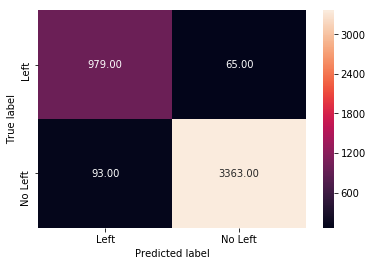

In [199]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [200]:
print(metrics.classification_report(tree_train_pred.actual,tree_train_pred.predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8000
           1       0.95      0.93      0.94      2499

   micro avg       0.97      0.97      0.97     10499
   macro avg       0.96      0.96      0.96     10499
weighted avg       0.97      0.97      0.97     10499



In [201]:
print(metrics.classification_report(tree_test_pred.actual,tree_test_pred.predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3428
           1       0.94      0.91      0.93      1072

   micro avg       0.96      0.96      0.96      4500
   macro avg       0.96      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



In [202]:
predict_proba_df.head()

,0,1
0,0.970474,0.029526
1,0.918471,0.081529
2,0.770428,0.229572
3,0.518490,0.481510
4,0.975083,0.024917


In [203]:
#How good the model is?
predict_proba_df = pd.DataFrame( clf_tree.predict_proba( train_X ) )

In [204]:
predict_proba_df.columns= ['left_0', 'left_1']

In [205]:
predict_proba_df.head()

,left_0,left_1
0,0.000000,1.000000
1,0.986738,0.013262
2,0.028362,0.971638
3,0.986738,0.013262
4,0.134094,0.865906


In [206]:
metrics.roc_auc_score(train_y,predict_proba_df.left_1 )

0.9730442927170869

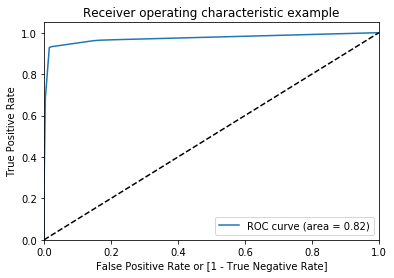

In [207]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( train_y,
                                     predict_proba_df.left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Fine Tuning the parameters

In [209]:
GridSearchCV?

In [210]:
?DecisionTreeClassifier

In [71]:
param_grid = {'max_depth': np.arange(3, 12),
             'max_features': np.arange(3,10)}

In [211]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring='roc_auc')
tree.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]), 'max_features': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [213]:
tree.best_score_

0.9773589733877701

In [214]:
tree.best_params_

{'max_depth': 6, 'max_features': 7}

In [215]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [216]:
metrics.roc_auc_score(train_y, pd.DataFrame(tree.predict_proba(train_X))[1])

0.9744276210484194

In [217]:
metrics.roc_auc_score(test_y, pd.DataFrame(tree.predict_proba(test_X))[1])

0.9626435718142079

In [218]:
train_pred = tree.predict(train_X)

In [219]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8000
           1       0.94      0.92      0.93      2499

   micro avg       0.97      0.97      0.97     10499
   macro avg       0.96      0.95      0.95     10499
weighted avg       0.97      0.97      0.97     10499



In [220]:
test_pred = tree.predict(test_X)

In [221]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3428
           1       0.94      0.89      0.91      1072

   micro avg       0.96      0.96      0.96      4500
   macro avg       0.95      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



### Building Final Decision Tree Model

In [222]:
clf_tree = DecisionTreeClassifier( max_depth = 6, max_features=7 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Feature Importance

In [223]:
train_X.columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [224]:
clf_tree.feature_importances_

array([3.11031107e-04, 2.81593337e-01, 3.95561592e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.25296811e-04, 6.10332710e-02,
       9.15719249e-02, 4.53005447e-03, 5.05180044e-04, 0.00000000e+00,
       4.05359679e-01, 1.50814609e-01])

In [225]:
var_imp = pd.concat([pd.Series(train_X.columns), pd.Series(clf_tree.feature_importances_)], axis=1)
var_imp.columns = ['feature', 'importance']

In [226]:
var_imp.sort_values('importance', ascending=False)

,feature,importance
16,satisfaction_level,0.405360
1,average_montly_hours,0.281593
17,time_spend_company,0.150815
12,number_project,0.091572
11,last_evaluation,0.061033
13,promotion_last_5years_1,0.004530
2,department_RandD,0.003956
14,salary_low,0.000505
10,department_technical,0.000325
0,Work_accident_1,0.000311


In [87]:
list(zip(train_X.columns,clf_tree.feature_importances_ ))

[('Work_accident_1', 0.0002920346426068441),
 ('average_montly_hours', 0.06690833521424401),
 ('department_RandD', 0.0),
 ('department_accounting', 0.0),
 ('department_hr', 0.0004704860736675906),
 ('department_management', 0.000621682598962818),
 ('department_marketing', 0.0005157432917674965),
 ('department_product_mng', 0.0),
 ('department_sales', 0.0004971997259112373),
 ('department_support', 0.0006754661459938363),
 ('department_technical', 0.0015681420396747318),
 ('last_evaluation', 0.16754745027132803),
 ('number_project', 0.20372286227778474),
 ('promotion_last_5years_1', 0.0011465570854754643),
 ('salary_low', 0.0019050994003486728),
 ('salary_medium', 0.0005079966211145538),
 ('satisfaction_level', 0.3179160255529723),
 ('time_spend_company', 0.23570491905814764)]

In [227]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [228]:
tree_test_pred.sample( n = 10 )

,actual,predicted
9514,0,0
4099,0,0
6896,0,1
6421,0,0
12427,1,0
13494,0,0
8117,0,0
2422,0,0
6817,0,0
8153,0,0


In [229]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9675555555555555

Text(0.5, 15.0, 'Predicted label')

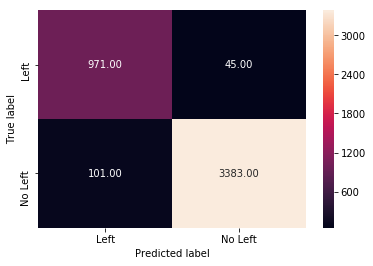

In [230]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Generate Rules from Decision Trees

#### To create a decision tree visualization graph.
- Install GraphViz (As per the OS and version you are using)
- pip install pydotplus
- Add the path to environmental variables
- Note: The notebook needs a restart.

In [231]:
clf_tree = DecisionTreeClassifier(max_depth=3)
clf_tree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [94]:
# Exporting the tree output in the form opendocument
export_graphviz( clf_tree,
              out_file = "hr_tree.odt",
              feature_names = train_X.columns )

In [232]:
# Converting open document file to jpg imanage

import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'hr_tree.odt' )

In [233]:
chd_tree_graph.write_jpg( 'hr_tree.jpg' )

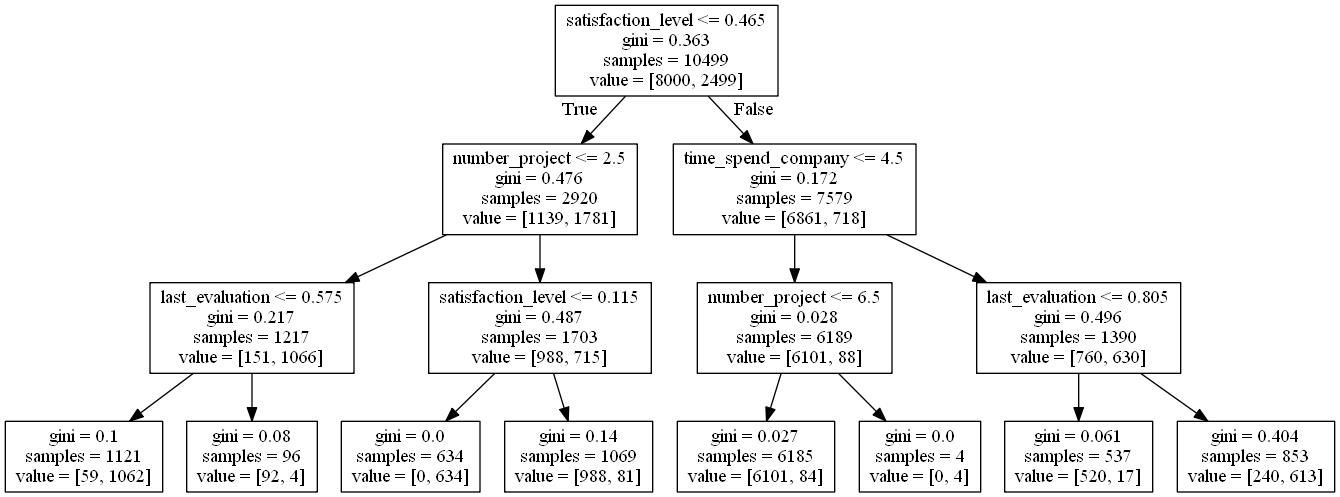

In [97]:
# Viewing the image in the notebook (display the image)
from IPython.display import Image
Image(filename='hr_tree.jpg')